TUGAS 1: MULTIPLE LINEAR REGRESSION
1. Identifikasi variabel-variabel yg akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal)

In [2]:
# melakukan import library
import numpy as np
import pandas as pd

# baca data dari file csv
data = pd.read_csv('insurance.csv')
data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [3]:
# Menampilkan beberapa data awal, ukuraan data, informasi data, dan deskripsi statistik untuk memahami karakteristik data
# ukuran data
data.shape

# info data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

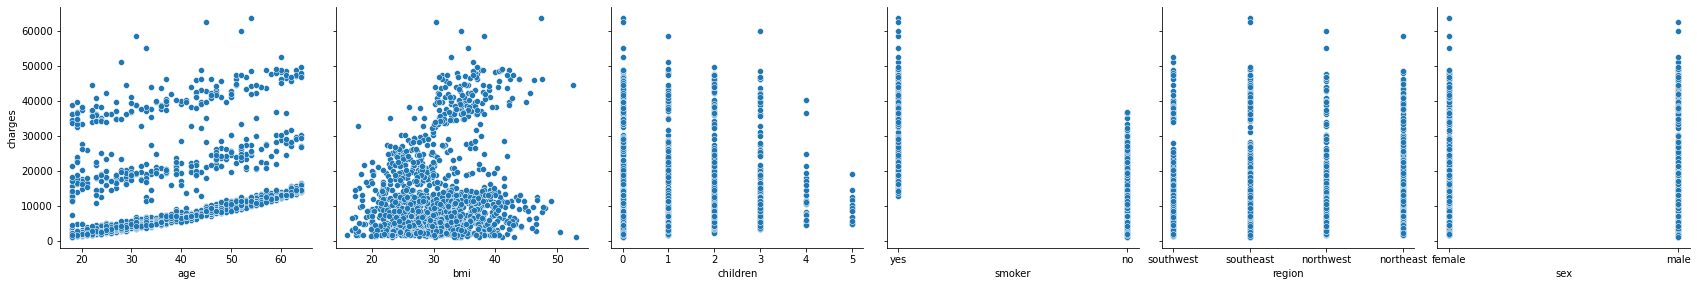

In [4]:
# import library untuk melakukan visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# operaasi visualisai
# sns.pairplot untuk melihat sebaran, distribusi dan outlier data
sns.pairplot(data, x_vars=['age', 'bmi','children', 'smoker', 'region', 'sex'],
             y_vars='charges', height=4, aspect=1, kind='scatter')
plt.show()

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai

In [5]:
data['sex'] = data['sex'].astype('category')
data['sex'] = data['sex'].cat.codes

data['smoker'] = data['smoker'].astype('category')
data['smoker'] = data['smoker'].cat.codes

data['region'] = data['region'].astype('category')
data['region'] = data['region'].cat.codes

data

age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]

In [6]:
# menentukan variabel independen dan dependen
X = data.drop(columns = 'charges')
y = data['charges']
X

age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]

In [7]:
# Buat pemisahan data uji dan data latih dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(936, 6) (402, 6) (936,) (402,)


3. Lakukan feature scaling jika diperlukan

In [8]:
# Feature Scaling
X = data.iloc[:, 0:5].values
y = data.iloc[:, 6].values
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
c = model.intercept_
print("Konstanta = ", c)

m = model.coef_
print("Koefisien Regresi = ", m)

Konstanta =  -10428.119803691536
Koefisien Regresi =  [ 2.59634761e+02 -5.43235302e-02  2.93390832e+02  4.67684029e+02
  2.40111697e+04 -4.99424941e+02]


4. Buat model multiple linear regression menggunakan Scikit-Learn.

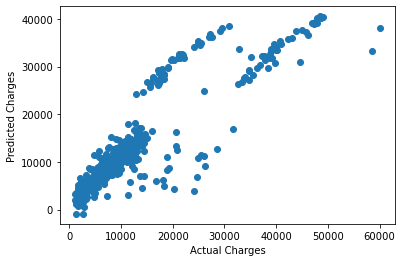

In [10]:
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()

5. Latih model pada data latih dan lakukan prediksi pada data uji.

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Hasil prediksi dan nilai target")
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
mlr_diff.head()

Hasil prediksi dan nilai target


Actual value  Predicted value
12     1826.84300      4137.795178
306   20177.67113      4346.994621
318    7421.19455      8607.174287
815    1877.92940      2995.801113
157   15518.18025     25642.535475

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [14]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Fit your regression model on the training data
regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = regressor.predict(X_test)

# Calculate evaluation metrics on the testing data
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)


MAE: 3935.564251349735
MSE: 32191230.365719203
RMSE: 5673.731608537648
R-squared: 0.7782937842162722
